In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns


from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

from collections import Counter

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# clustering
from sklearn.cluster import KMeans


In [178]:
df = pd.read_csv('UFO-1149.csv')
df.head()

datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

   duration (seconds) duration (hours/min)  \
0              2700.0           45 minutes   
1              7200.0              1-2 hrs   
2                20.0           20 seconds   
3                20.0             1/2 hour   
4               900.0           15 minutes   

                                            comments date posted  latitude  \
0  This event took place in early fall around 194...   4/27/2004   29.8831   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005   29.3842   
2  Green/Orange circular disc over Chester&#44 En...   1/21/2008   53.2000   
3  My older brother and twin sister were leaving ...   1/17/2004   28.9783   
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004   21.4181   

   longitude  
0   -97.9411  
1   -98.5811  
2    -2.9167  
3   -96.6458  
4  -157.8036

In [118]:
df.shape

(80332, 11)

AttributeError: Unknown property column

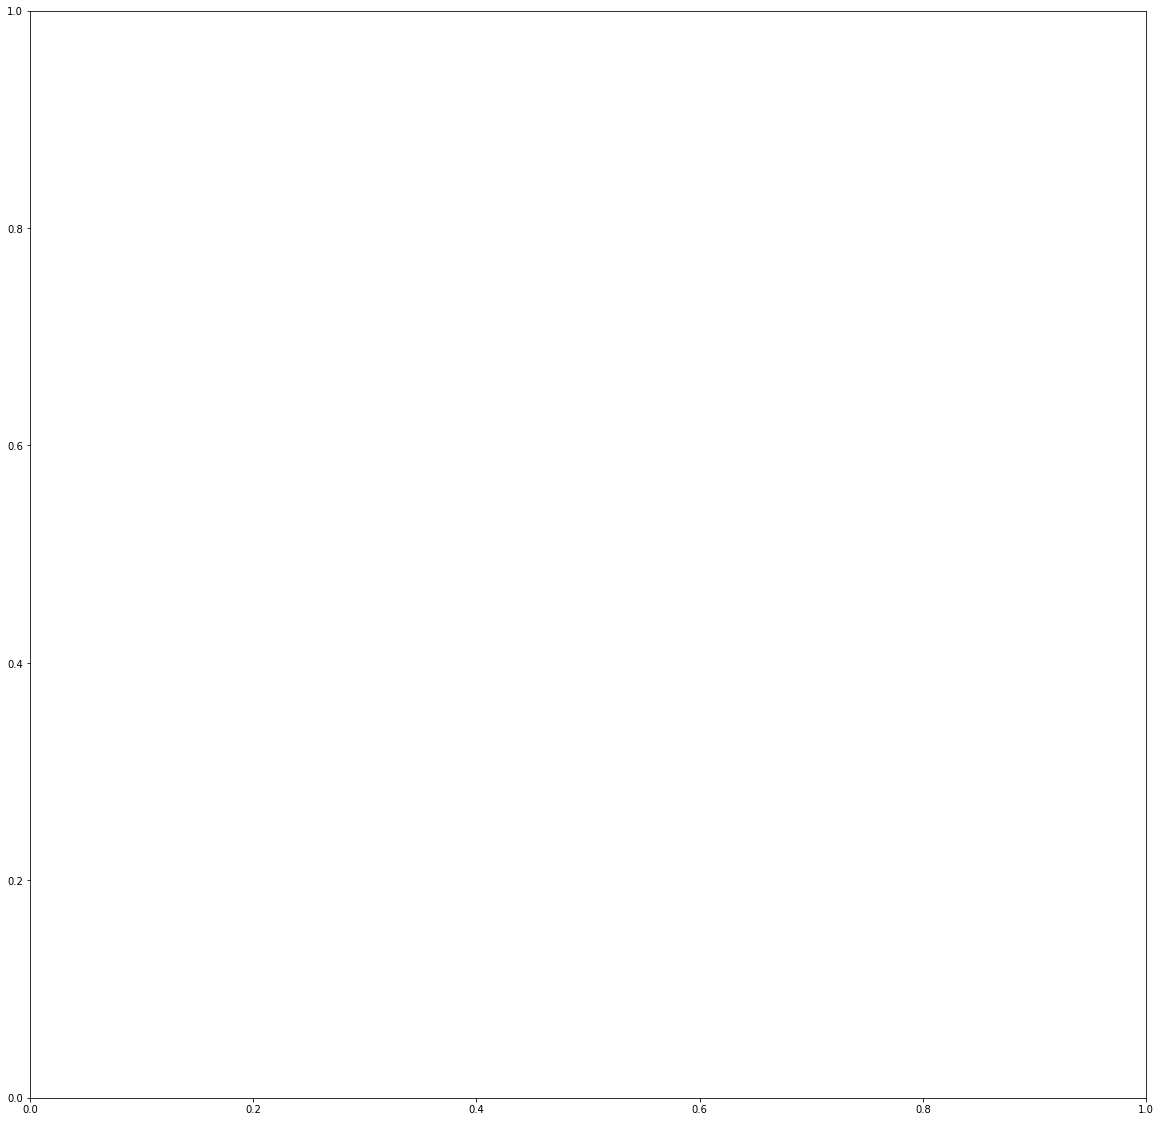

In [119]:
df.plot(column='country',cmap='Reds',figsize=(20,20))
plt.show()

In [62]:
# vectorizer = TfidfVectorizer()

In [63]:
# X = vectorizer.fit_transform(df).toarray()

In [64]:
# vocab = vectorizer.get_feature_names()

In [65]:
# print(vocab)

In [81]:
df.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  14
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime                80332 non-null int64
city                    80332 non-null int64
state                   74535 non-null object
country                 70662 non-null object
shape                   78400 non-null object
duration (seconds)      80332 non-null float64
duration (hours/min)    80332 non-null object
comments                80318 non-null object
date posted             80332 non-null object
latitude                80332 non-null float64
longitude               80332 non-null float64
dtypes: float64(3), int64(2), object(6)
memory usage: 6.7+ MB


In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
label = LabelEncoder()

In [179]:
col = df.select_dtypes(exclude = object)

col_number = col.columns

In [105]:
col_number

Index(['datetime', 'city', 'duration (seconds)', 'latitude', 'longitude'], dtype='object')

In [167]:
df['comments']

0        This event took place in early fall around 194...
1        1949 Lackland AFB&#44 TX.  Lights racing acros...
2        Green/Orange circular disc over Chester&#44 En...
3        My older brother and twin sister were leaving ...
4        AS a Marine 1st Lt. flying an FJ4B fighter/att...
5        My father is now 89 my brother 52 the girl wit...
6        penarth uk  circle  3mins  stayed 30ft above m...
7        A bright orange color changing to reddish colo...
8        Strobe Lighted disk shape object observed clos...
9        Saucer zaps energy from powerline as my pregna...
10       ROUND &#44 ORANGE &#44 WITH WHAT I WOULD SAY W...
11       silent red /orange mass of energy floated by t...
12                silver disc seen by family and neighbors
13       Slow moving&#44 silent craft accelerated at an...
14       green oval shaped light over my local church&#...
15       On october 10&#44 1972 myself&#44my 5yrs.daugh...
16       The UFO was so close&#44 my battery in the car.

In [162]:
vectorizer = TfidfVectorizer(max_features=20, stop_words='english')

In [174]:
!pip install wordcloud

In [175]:
from wordcloud import WordCloud
from collections import Counter

In [176]:
words = []
words.extend(word_tokenize(df['comments']))

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\victor.n/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\victor.n\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [156]:
# X = pd.DataFrame(X, columns=vocab)

In [ ]:
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(frequencies = Counter(words))

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [158]:
X

city  comments  country      date  datetime  duration     hours  latitude  \
0    0.0       0.0      0.0  0.000000       1.0  0.000000  0.000000       0.0   
1    1.0       0.0      0.0  0.000000       0.0  0.000000  0.000000       0.0   
2    0.0       0.0      0.0  0.000000       0.0  0.000000  0.000000       0.0   
3    0.0       0.0      1.0  0.000000       0.0  0.000000  0.000000       0.0   
4    0.0       0.0      0.0  0.000000       0.0  0.000000  0.000000       0.0   
5    0.0       0.0      0.0  0.000000       0.0  0.649748  0.000000       0.0   
6    0.0       0.0      0.0  0.000000       0.0  0.517268  0.605159       0.0   
7    0.0       1.0      0.0  0.000000       0.0  0.000000  0.000000       0.0   
8    0.0       0.0      0.0  0.707107       0.0  0.000000  0.000000       0.0   
9    0.0       0.0      0.0  0.000000       0.0  0.000000  0.000000       1.0   
10   0.0       0.0      0.0  0.000000       0.0  0.000000  0.000000       0.0   

    longitude       min    posted  seconds  shape  state  
0         0.0  0.000000  0.000000  0.00000    0.0    0.0  
1         0.0  0.000000  0.000000  0.00000    0.0    0.0  
2         0.0  0.000000  0.000000  0.00000    0.0    1.0  
3         0.0  0.000000  0.000000  0.00000    0.0    0.0  
4         0.0  0.000000  0.000000  0.00000    1.0    0.0  
5         0.0  0.000000  0.000000  0.76015    0.0    0.0  
6         0.0  0.605159  0.000000  0.00000    0.0    0.0  
7         0.0  0.000000  0.000000  0.00000    0.0    0.0  
8         0.0  0.000000  0.707107  0.00000    0.0    0.0  
9         0.0  0.000000  0.000000  0.00000    0.0    0.0  
10        1.0  0.000000  0.000000  0.00000    0.0    0.0

In [106]:
# print("n_samples: %d, n_features: %d" % X.shape)

In [180]:
scaler = StandardScaler()

In [181]:
df[col_number] = scaler.fit_transform(df[col_number])

In [109]:
n_clusters = np.arange(1, 21)

In [157]:

# store errors for each value of k
errors = []

# for i between 1 and 20
for k in n_clusters:
    # perform k-means clustering
    km = KMeans(n_clusters=k)
    km.fit(X)
    # measure WCSS
    errors.append(km.inertia_)

ValueError: n_samples=11 should be >= n_clusters=12

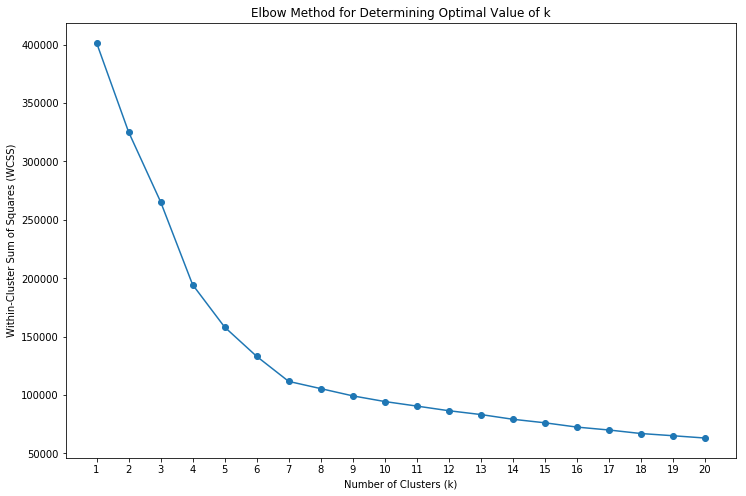

In [111]:
plt.figure(figsize=(12,8))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal Value of k')
plt.scatter(n_clusters, errors)
plt.plot(n_clusters, errors)
plt.xticks(n_clusters)
plt.show()

In [112]:
# remember to set the random state for reproducibility
km = KMeans(n_clusters=5)
print("Clustering sparse data with %s" % km)
km.fit(df[col_number])

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
df['km_cluster'] = km.labels_

In [ ]:
df = gpd.GeoDataFrame(df)

In [134]:
vectorizer = TfidfVectorizer(stop_words='english')

In [140]:
df.head()

datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

   duration (seconds) duration (hours/min)  \
0              2700.0           45 minutes   
1              7200.0              1-2 hrs   
2                20.0           20 seconds   
3                20.0             1/2 hour   
4               900.0           15 minutes   

                                            comments date posted  latitude  \
0    (0, 10950)\t0.1758824374959309\n  (0, 26901)...   4/27/2004   29.8831   
1    (0, 10950)\t0.1758824374959309\n  (0, 26901)...  12/16/2005   29.3842   
2    (0, 10950)\t0.1758824374959309\n  (0, 26901)...   1/21/2008   53.2000   
3    (0, 10950)\t0.1758824374959309\n  (0, 26901)...   1/17/2004   28.9783   
4    (0, 10950)\t0.1758824374959309\n  (0, 26901)...   1/22/2004   21.4181   

   longitude  
0   -97.9411  
1   -98.5811  
2    -2.9167  
3   -96.6458  
4  -157.8036

In [146]:
df['comments'] = df['comments'].fillna('')

In [147]:
df.head()

datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

   duration (seconds) duration (hours/min)  \
0              2700.0           45 minutes   
1              7200.0              1-2 hrs   
2                20.0           20 seconds   
3                20.0             1/2 hour   
4               900.0           15 minutes   

                                            comments date posted  latitude  \
0  This event took place in early fall around 194...   4/27/2004   29.8831   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005   29.3842   
2  Green/Orange circular disc over Chester&#44 En...   1/21/2008   53.2000   
3  My older brother and twin sister were leaving ...   1/17/2004   28.9783   
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004   21.4181   

   longitude  
0   -97.9411  
1   -98.5811  
2    -2.9167  
3   -96.6458  
4  -157.8036

In [148]:
vectorizer = TfidfVectorizer(max_features=20, stop_words='english')

In [129]:

X_words = tfidf.inverse_transform(X) ## this will give you words instead of tfidf where tfidf > 0

tokenizer = vectorizer.build_tokenizer() ## return tokenizer function used in tfidfvectorizer

for idx,words in enumerate(X_words):
    for word in words:
        count = tokenizer(corpus[idx]).count(word)
        print(idx,word,count)

<11x14 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [182]:
df['comments']

0        This event took place in early fall around 194...
1        1949 Lackland AFB&#44 TX.  Lights racing acros...
2        Green/Orange circular disc over Chester&#44 En...
3        My older brother and twin sister were leaving ...
4        AS a Marine 1st Lt. flying an FJ4B fighter/att...
5        My father is now 89 my brother 52 the girl wit...
6        penarth uk  circle  3mins  stayed 30ft above m...
7        A bright orange color changing to reddish colo...
8        Strobe Lighted disk shape object observed clos...
9        Saucer zaps energy from powerline as my pregna...
10       ROUND &#44 ORANGE &#44 WITH WHAT I WOULD SAY W...
11       silent red /orange mass of energy floated by t...
12                silver disc seen by family and neighbors
13       Slow moving&#44 silent craft accelerated at an...
14       green oval shaped light over my local church&#...
15       On october 10&#44 1972 myself&#44my 5yrs.daugh...
16       The UFO was so close&#44 my battery in the car.